# Deep Learning Project
## Mask detection

Group members:
- Lorenzo Pigozzi	--- m20200745
- Marta
- Gustavo
- Salim




### Steps
1.	Importing data and setting the directions 
2.	Brief data preprocessing       
3.	Model architecture 
4.  Model assessment      
5.  Deployment

### 1. Importing libraries and setting the directions <a class="anchor" id="1"></a>

In [70]:
# importing needed libraries
#%tensorflow_version 1.x
import tensorflow
import pandas as pd
import numpy as np
import keras
import os, shutil
import io


# keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import callbacks 

# sklearn
from sklearn.metrics import classification_report, confusion_matrix

# matplotlib
import matplotlib.pyplot as plt

Directions Google Colab

In [2]:

# # for downloading the pictures
# from google.colab import drive
# drive.mount('/content/gdrive')
# !ls '/content/gdrive'  # take a look at the Google Drive content

In [3]:
# ######## defining the paths
# original_masks = "gdrive/MyDrive/Project Deeplearning/Pics_with_masks/withMaskDataset/withMaskDataset/"
# original_faces = "gdrive/MyDrive/Project Deeplearning/Images/"

In [4]:
# # !ls /content/gdrive/MyDrive/Project_Deeplearning
# base_dir = 'gdrive/MyDrive/Project Deeplearning/'

# # creationof the folder
# # os.mkdir(train_dir)
# # setting the direction of the train
# train_dir = os.path.join(base_dir, 'train')

# # creationof the folder
# # os.mkdir(validation_dir)
# # setting the direction of the train
# validation_dir=os.path.join(base_dir, 'validation')

# # creationof the folder
# # os.mkdir(test_dir)
# # setting the direction of the train
# test_dir=os.path.join(base_dir, 'test')

In [5]:
# train_masks_dir=os.path.join(train_dir, 'masks')
# # os.mkdir(train_masks_dir)
# train_no_masks_dir=os.path.join(train_dir, 'no_masks')
# # os.mkdir(train_no_masks_dir)

# validation_masks_dir=os.path.join(validation_dir, 'masks')
# # os.mkdir(validation_masks_dir)
# validation_no_masks_dir=os.path.join(validation_dir, 'no_masks')
# # os.mkdir(validation_no_masks_dir)

# test_masks_dir=os.path.join(test_dir, 'masks')
# # os.mkdir(test_masks_dir)
# test_no_masks_dir=os.path.join(test_dir, 'no_masks')
# # os.mkdir(test_no_masks_dir)

In [6]:
#### Splitting the images in the folders Train, Validation and Test

## Train = 70, Val 15, Test 15

#fnames = ['Masks{}.png'.format(i) for i in range(0,989)]
#for fname in fnames:
#  src=os.path.join(original_masks, fname)
#  dst=os.path.join(train_masks_dir, fname)
#  shutil.copyfile(src,dst)

#fnames = ['Masks{}.png'.format(i) for i in range(990,1201)]
#for fname in fnames:
#   src=os.path.join(original_masks, fname)
#   dst=os.path.join(validation_masks_dir, fname)
#   shutil.copyfile(src,dst)

#fnames = ['Masks{}.png'.format(i) for i in range(1202,1413)]
#for fname in fnames:
#   src=os.path.join(original_masks, fname)
#   dst=os.path.join(test_masks_dir, fname)
#   shutil.copyfile(src,dst)


#fnames = ['Faces{}.png'.format(i) for i in range(0,989)]
#for fname in fnames:
#   src=os.path.join(original_faces, fname)
#   dst=os.path.join(train_no_masks_dir, fname)
#   shutil.copyfile(src,dst)

#fnames = ['Faces{}.png'.format(i) for i in range(990,1201)]
#for fname in fnames:
#   src=os.path.join(original_faces, fname)
#   dst=os.path.join(validation_no_masks_dir, fname)
#   shutil.copyfile(src,dst)

#fnames = ['Faces{}.png'.format(i) for i in range(1202,1413)]
#for fname in fnames:
#   src=os.path.join(original_faces, fname)
#   dst=os.path.join(test_no_masks_dir, fname)
#   shutil.copyfile(src,dst)

### 2. Model Architecture

In [7]:
# Sequential model | Create linear stack of layers
model = Sequential()

# Convolutional layer | Conv2D
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(144,144, 3)))
model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model.add(Flatten())
# Hidden layer
model.add(Dense(32, activation='relu'))
# Output layer
model.add(Dense(1, activation='sigmoid'))

In [8]:
# compiling the model
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [9]:
# visualizing the model structure
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 142, 142, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 71, 71, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 161312)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                5162016   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 5,162,945
Trainable params: 5,162,945
Non-trainable params: 0
_________________________________________________________________


In [10]:
# scaling the data
train_datagen=ImageDataGenerator(rescale = 1./255)
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen=ImageDataGenerator(rescale = 1./255)

In [11]:
# importing the images
# flow when numpy array input, flow_from_directory when the inputs are directly images

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (144, 144),
                                                 batch_size = 20,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (144, 144),
                                                        batch_size = 20,
                                                        color_mode="rgb",
                                                        class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (144, 144),
                                            batch_size = 20,
                                            class_mode = 'binary',
                                            shuffle = False)


Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [12]:
# fitting the model
Epochs = 20

#hist=model.fit_generator(training_set,
#                         steps_per_epoch = 99,
#                         epochs = 1,
#                         validation_data = validation_set,
#                         validation_steps = 28)

#hist=model.fit_generator(training_set,
#                         validation_data = validation_set,
#                         epochs= Epochs ,
#                         steps_per_epoch = len(validation_set),
#                         validation_steps = len(validation_set)
#                         )


# hist=model.fit_generator(training_set,
#                          validation_data = validation_set,
#                          epochs = Epochs,
#                          steps_per_epoch = len(validation_set)
#                          )

hist=model.fit_generator(training_set,
                         steps_per_epoch = 49,
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10
                         )

C:\Users\marta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
19/49 [==========>...................] - ETA: 21s - loss: 4.2716 - accuracy: 0.5330

C:\Users\marta\anaconda3\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - 34s 684ms/step - loss: 3.1380 - accuracy: 0.5699 - val_loss: 0.6910 - val_accuracy: 0.6000
Epoch 2/20
49/49 [==============================] - 34s 685ms/step - loss: 0.4992 - accuracy: 0.7578 - val_loss: 0.4326 - val_accuracy: 0.7800
Epoch 3/20
49/49 [==============================] - 34s 681ms/step - loss: 0.3088 - accuracy: 0.8837 - val_loss: 0.4667 - val_accuracy: 0.8100
Epoch 4/20
49/49 [==============================] - 34s 679ms/step - loss: 0.1886 - accuracy: 0.9364 - val_loss: 0.3880 - val_accuracy: 0.8500
Epoch 5/20
49/49 [==============================] - 32s 658ms/step - loss: 0.1425 - accuracy: 0.9559 - val_loss: 0.4797 - val_accuracy: 0.8150
Epoch 6/20
49/49 [==============================] - 32s 655ms/step - loss: 0.0751 - accuracy: 0.9822 - val_loss: 0.3709 - val_accuracy: 0.8650
Epoch 7/20
49/49 [==============================] - 31s 640ms/step - loss: 0.0443 - accuracy: 0.9969 - val_loss: 0.3385 - val_accuracy: 0.8950
Epoch 8/20

In [13]:
# possible solution to solve the problem above

#from io import BytesIO
#BytesIO(b"0x7fbac83f9350")

In [14]:
# # checking the information of the batch we split
# # checking if it makes sense with the size of the images

# batchX, batchy = train_iterator.next()
# print('Train Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

# batchX, batchy = validation_iterator.next()
# print('Validation Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

# batchX, batchy = test_iterator.next()
# print('Test Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

In [15]:
# FINALLY OUR MODEL PREDICT

Y_pred = model.predict_generator(test_set, len(validation_set))    # ceil(num_of_test_samples / batch_size)

# changing the result as True and False
Y_pred = (Y_pred>0.5)



# if you have the last version of tensorflow, the predict_generator is deprecated.
# you should use the predict method.
# if you do not have the last version, you must use predict_generator

C:\Users\marta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [16]:
Y_pred.shape

(422, 1)

In [17]:
test_set.classes.shape

(422,)

## Prediction assessment

In [18]:
# confusion matrix
print('Confusion matrix')
print(confusion_matrix(test_set.classes, Y_pred))

Confusion matrix
[[188  23]
 [ 39 172]]


In [19]:
# classification report
print('Classification Report')
target_names = ['No Mask', 'Mask']
print(classification_report(test_set.classes, Y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     No Mask       0.83      0.89      0.86       211
        Mask       0.88      0.82      0.85       211

    accuracy                           0.85       422
   macro avg       0.86      0.85      0.85       422
weighted avg       0.86      0.85      0.85       422



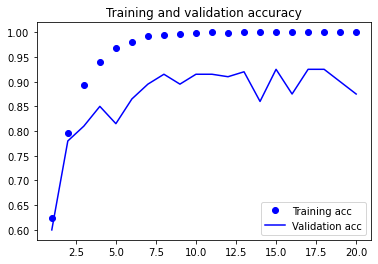

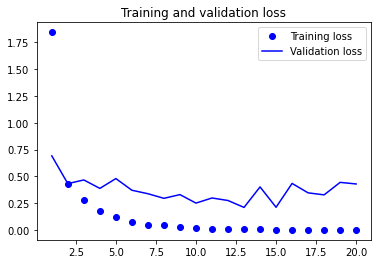

In [20]:
# plotting

# displaying the accuracy and loss over the training epochs
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# New trial - Data augmentation and batch size of 40

In [56]:
# visualizing the model structure
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 142, 142, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 71, 71, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 161312)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                5162016   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 5,162,945
Trainable params: 5,162,945
Non-trainable params: 0
_________________________________________________________________


In [57]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# test set only rescaled
test_datagen = ImageDataGenerator(rescale = 1./255)

In [58]:
# importing the images
# flow when numpy array input, flow_from_directory when the inputs are directly images

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (144, 144),
                                                 batch_size = 40,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (144, 144),
                                                        batch_size = 40,
                                                        color_mode="rgb",
                                                        class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (144, 144),
                                            batch_size = 40,
                                            class_mode = 'binary',
                                            shuffle = False)


Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [59]:
# fitting the model
Epochs = 20


hist=model.fit_generator(training_set,
                         steps_per_epoch = 49,
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10
                         )

Epoch 1/20
49/49 [==============================] - 61s 1s/step - loss: 0.0948 - accuracy: 0.9654 - val_loss: 0.9382 - val_accuracy: 0.7700
Epoch 2/20
49/49 [==============================] - 66s 1s/step - loss: 0.0756 - accuracy: 0.9721 - val_loss: 0.6723 - val_accuracy: 0.8475
Epoch 3/20
49/49 [==============================] - 62s 1s/step - loss: 0.0665 - accuracy: 0.9799 - val_loss: 0.6834 - val_accuracy: 0.8525
Epoch 4/20
49/49 [==============================] - 64s 1s/step - loss: 0.0670 - accuracy: 0.9768 - val_loss: 0.6234 - val_accuracy: 0.8450
Epoch 5/20
49/49 [==============================] - 63s 1s/step - loss: 0.0616 - accuracy: 0.9783 - val_loss: 0.8144 - val_accuracy: 0.8225
Epoch 6/20
49/49 [==============================] - 63s 1s/step - loss: 0.0639 - accuracy: 0.9799 - val_loss: 0.9360 - val_accuracy: 0.8000
Epoch 7/20
49/49 [==============================] - 65s 1s/step - loss: 0.0765 - accuracy: 0.9716 - val_loss: 0.8527 - val_accuracy: 0.8175
Epoch 8/20
49/49 [==

In [60]:
# FINALLY OUR MODEL PREDICT

Y_pred = model.predict_generator(test_set, len(validation_set))    # ceil(num_of_test_samples / batch_size)

# changing the result as True and False
Y_pred = (Y_pred>0.5)


In [61]:
Y_pred.shape

(422, 1)

In [62]:
test_set.classes.shape

(422,)

## Prediction assessment

In [63]:
# confusion matrix
print('Confusion matrix')
print(confusion_matrix(test_set.classes, Y_pred))

Confusion matrix
[[192  19]
 [ 26 185]]


In [64]:
# classification report
print('Classification Report')
target_names = ['No Mask', 'Mask']
print(classification_report(test_set.classes, Y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     No Mask       0.88      0.91      0.90       211
        Mask       0.91      0.88      0.89       211

    accuracy                           0.89       422
   macro avg       0.89      0.89      0.89       422
weighted avg       0.89      0.89      0.89       422



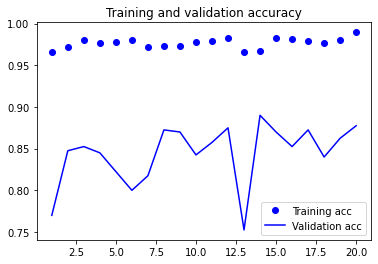

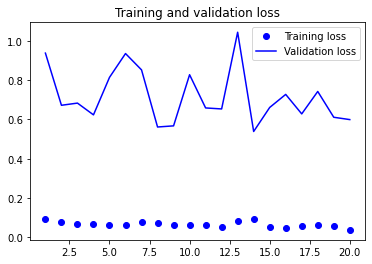

In [65]:
# plotting

# displaying the accuracy and loss over the training epochs
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Dropout

In [71]:
# Sequential model | Create linear stack of layers
model = Sequential()

# Convolutional layer | Conv2D
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(144,144, 3)))
model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model.add(Flatten())
model.add(Dropout(0.2))
# Hidden layer
model.add(Dense(32, activation='relu'))
# Output layer
model.add(Dense(1, activation='sigmoid'))

In [72]:
# compiling the model
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [73]:
# visualizing the model structure
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 142, 142, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 71, 71, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 161312)            0         
_________________________________________________________________
dropout (Dropout)            (None, 161312)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                5162016   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 5,162,945
Trainable params: 5,162,945
Non-trainable params: 0
____________________________________________

In [74]:
# scaling the data
train_datagen=ImageDataGenerator(rescale = 1./255)
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen=ImageDataGenerator(rescale = 1./255)

In [75]:
# importing the images
# flow when numpy array input, flow_from_directory when the inputs are directly images

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (144, 144),
                                                 batch_size = 20,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (144, 144),
                                                        batch_size = 20,
                                                        color_mode="rgb",
                                                        class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (144, 144),
                                            batch_size = 20,
                                            class_mode = 'binary',
                                            shuffle = False)


Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [76]:
# fitting the model
Epochs = 20

#hist=model.fit_generator(training_set,
#                         steps_per_epoch = 99,
#                         epochs = 1,
#                         validation_data = validation_set,
#                         validation_steps = 28)

#hist=model.fit_generator(training_set,
#                         validation_data = validation_set,
#                         epochs= Epochs ,
#                         steps_per_epoch = len(validation_set),
#                         validation_steps = len(validation_set)
#                         )


# hist=model.fit_generator(training_set,
#                          validation_data = validation_set,
#                          epochs = Epochs,
#                          steps_per_epoch = len(validation_set)
#                          )

hist=model.fit_generator(training_set,
                         steps_per_epoch = 49,
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10
                         )

Epoch 1/20
49/49 [==============================] - 60s 1s/step - loss: 1.4643 - accuracy: 0.5872 - val_loss: 0.4881 - val_accuracy: 0.8000
Epoch 2/20
49/49 [==============================] - 63s 1s/step - loss: 0.4374 - accuracy: 0.8001 - val_loss: 0.4075 - val_accuracy: 0.8500
Epoch 3/20
49/49 [==============================] - 56s 1s/step - loss: 0.2865 - accuracy: 0.8860 - val_loss: 0.4196 - val_accuracy: 0.8000
Epoch 4/20
49/49 [==============================] - 62s 1s/step - loss: 0.1734 - accuracy: 0.9431 - val_loss: 0.3349 - val_accuracy: 0.8250
Epoch 5/20
49/49 [==============================] - 61s 1s/step - loss: 0.1404 - accuracy: 0.9563 - val_loss: 0.3265 - val_accuracy: 0.8850
Epoch 6/20
49/49 [==============================] - 60s 1s/step - loss: 0.0858 - accuracy: 0.9786 - val_loss: 0.2463 - val_accuracy: 0.8950
Epoch 7/20
49/49 [==============================] - 62s 1s/step - loss: 0.0610 - accuracy: 0.9896 - val_loss: 0.2305 - val_accuracy: 0.8900
Epoch 8/20
49/49 [==

In [77]:
# possible solution to solve the problem above

#from io import BytesIO
#BytesIO(b"0x7fbac83f9350")

In [78]:
# # checking the information of the batch we split
# # checking if it makes sense with the size of the images

# batchX, batchy = train_iterator.next()
# print('Train Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

# batchX, batchy = validation_iterator.next()
# print('Validation Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

# batchX, batchy = test_iterator.next()
# print('Test Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

In [79]:
# FINALLY OUR MODEL PREDICT

Y_pred = model.predict_generator(test_set, len(validation_set))    # ceil(num_of_test_samples / batch_size)

# changing the result as True and False
Y_pred = (Y_pred>0.5)



# if you have the last version of tensorflow, the predict_generator is deprecated.
# you should use the predict method.
# if you do not have the last version, you must use predict_generator

In [80]:
Y_pred.shape

(422, 1)

In [17]:
test_set.classes.shape

(422,)

## Prediction assessment

In [18]:
# confusion matrix
print('Confusion matrix')
print(confusion_matrix(test_set.classes, Y_pred))

Confusion matrix
[[188  23]
 [ 39 172]]


In [19]:
# classification report
print('Classification Report')
target_names = ['No Mask', 'Mask']
print(classification_report(test_set.classes, Y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     No Mask       0.83      0.89      0.86       211
        Mask       0.88      0.82      0.85       211

    accuracy                           0.85       422
   macro avg       0.86      0.85      0.85       422
weighted avg       0.86      0.85      0.85       422



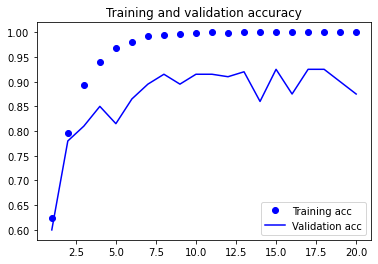

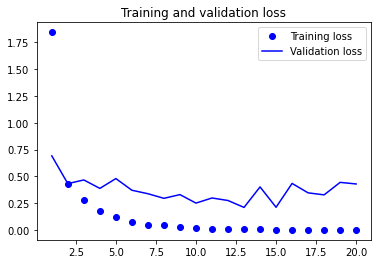

In [20]:
# plotting

# displaying the accuracy and loss over the training epochs
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Dropout & data augmentation


In [87]:
# Sequential model | Create linear stack of layers
model = Sequential()

# Convolutional layer | Conv2D
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(144,144, 3)))
model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model.add(Flatten())
model.add(Dropout(0.2))
# Hidden layer
model.add(Dense(32, activation='relu'))
# Output layer
model.add(Dense(1, activation='sigmoid'))

In [92]:
# compiling the model
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [88]:
# visualizing the model structure
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 142, 142, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 71, 71, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 161312)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 161312)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                5162016   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 5,162,945
Trainable params: 5,162,945
Non-trainable params: 0
____________________________________________

In [89]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# test set only rescaled
test_datagen = ImageDataGenerator(rescale = 1./255)

In [90]:
# importing the images
# flow when numpy array input, flow_from_directory when the inputs are directly images

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (144, 144),
                                                 batch_size = 40,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (144, 144),
                                                        batch_size = 40,
                                                        color_mode="rgb",
                                                        class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (144, 144),
                                            batch_size = 40,
                                            class_mode = 'binary',
                                            shuffle = False)


Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [93]:
# fitting the model
Epochs = 20


hist=model.fit_generator(training_set,
                         steps_per_epoch = 49,
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10
                         )

Epoch 1/20
49/49 [==============================] - 143s 3s/step - loss: 1.2320 - accuracy: 0.6279 - val_loss: 0.5804 - val_accuracy: 0.7300
Epoch 2/20
49/49 [==============================] - 139s 3s/step - loss: 0.4929 - accuracy: 0.7700 - val_loss: 0.4456 - val_accuracy: 0.8175
Epoch 3/20
49/49 [==============================] - 143s 3s/step - loss: 0.4842 - accuracy: 0.7609 - val_loss: 0.4060 - val_accuracy: 0.8200
Epoch 4/20
49/49 [==============================] - 145s 3s/step - loss: 0.3855 - accuracy: 0.8388 - val_loss: 0.4804 - val_accuracy: 0.7675
Epoch 5/20
49/49 [==============================] - 144s 3s/step - loss: 0.3783 - accuracy: 0.8326 - val_loss: 0.3877 - val_accuracy: 0.8175
Epoch 6/20
49/49 [==============================] - 146s 3s/step - loss: 0.3328 - accuracy: 0.8618 - val_loss: 0.4320 - val_accuracy: 0.7875
Epoch 7/20
49/49 [==============================] - 139s 3s/step - loss: 0.3410 - accuracy: 0.8559 - val_loss: 0.3611 - val_accuracy: 0.8350
Epoch 8/20
49

In [94]:
# FINALLY OUR MODEL PREDICT

Y_pred = model.predict_generator(test_set, len(validation_set))    # ceil(num_of_test_samples / batch_size)

# changing the result as True and False
Y_pred = (Y_pred>0.5)


In [95]:
Y_pred.shape

(422, 1)

In [96]:
test_set.classes.shape

(422,)

## Prediction assessment

In [97]:
# confusion matrix
print('Confusion matrix')
print(confusion_matrix(test_set.classes, Y_pred))

Confusion matrix
[[179  32]
 [ 20 191]]


In [98]:
# classification report
print('Classification Report')
target_names = ['No Mask', 'Mask']
print(classification_report(test_set.classes, Y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     No Mask       0.90      0.85      0.87       211
        Mask       0.86      0.91      0.88       211

    accuracy                           0.88       422
   macro avg       0.88      0.88      0.88       422
weighted avg       0.88      0.88      0.88       422



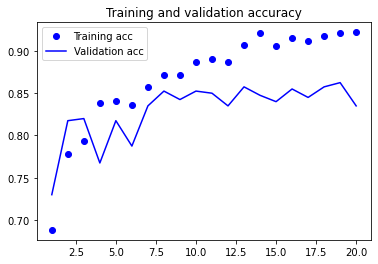

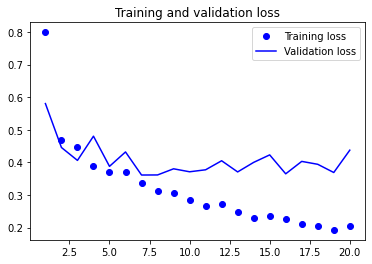

In [99]:
# plotting

# displaying the accuracy and loss over the training epochs
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Dropout & data augmentation 3 - 2 dropout


In [134]:
# Sequential model | Create linear stack of layers
model = Sequential()

# Convolutional layer | Conv2D
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model.add(Flatten())
model.add(Dropout(0.5))
# Hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
# Output layer
model.add(Dense(1, activation='sigmoid'))

In [135]:
# compiling the model
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [136]:
# visualizing the model structure
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 175232)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                5607456   
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [137]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# test set only rescaled
test_datagen = ImageDataGenerator(rescale = 1./255)

In [138]:
# importing the images
# flow when numpy array input, flow_from_directory when the inputs are directly images

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = 23,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = 23,
                                                        color_mode="rgb",
                                                        class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = 23,
                                            class_mode = 'binary',
                                            shuffle = False)


Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [139]:
# fitting the model
Epochs = 10


hist=model.fit_generator(training_set,
                         steps_per_epoch = 86,
                         epochs = 10,
                         validation_data = validation_set,
                         validation_steps = len(validation_set)
                         )

Epoch 1/10
86/86 [==============================] - 146s 2s/step - loss: 1.2989 - accuracy: 0.6308 - val_loss: 0.4344 - val_accuracy: 0.8033
Epoch 2/10
86/86 [==============================] - 142s 2s/step - loss: 0.5109 - accuracy: 0.7621 - val_loss: 0.3906 - val_accuracy: 0.8294
Epoch 3/10
86/86 [==============================] - 142s 2s/step - loss: 0.4376 - accuracy: 0.8133 - val_loss: 0.3799 - val_accuracy: 0.8270
Epoch 4/10
86/86 [==============================] - 142s 2s/step - loss: 0.3859 - accuracy: 0.8259 - val_loss: 0.4041 - val_accuracy: 0.8033
Epoch 5/10
86/86 [==============================] - 141s 2s/step - loss: 0.3986 - accuracy: 0.8167 - val_loss: 0.3951 - val_accuracy: 0.8081
Epoch 6/10
86/86 [==============================] - 139s 2s/step - loss: 0.3831 - accuracy: 0.8167 - val_loss: 0.3987 - val_accuracy: 0.8152
Epoch 7/10
86/86 [==============================] - 144s 2s/step - loss: 0.3741 - accuracy: 0.8277 - val_loss: 0.4108 - val_accuracy: 0.8033
Epoch 8/10
86

In [140]:
# FINALLY OUR MODEL PREDICT

Y_pred = model.predict_generator(test_set, len(validation_set))    # ceil(num_of_test_samples / batch_size)

# changing the result as True and False
Y_pred = (Y_pred>0.5)


In [141]:
Y_pred.shape

(422, 1)

In [142]:
test_set.classes.shape

(422,)

## Prediction assessment

In [143]:
# confusion matrix
print('Confusion matrix')
print(confusion_matrix(test_set.classes, Y_pred))

Confusion matrix
[[178  33]
 [ 34 177]]


In [144]:
# classification report
print('Classification Report')
target_names = ['No Mask', 'Mask']
print(classification_report(test_set.classes, Y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     No Mask       0.84      0.84      0.84       211
        Mask       0.84      0.84      0.84       211

    accuracy                           0.84       422
   macro avg       0.84      0.84      0.84       422
weighted avg       0.84      0.84      0.84       422



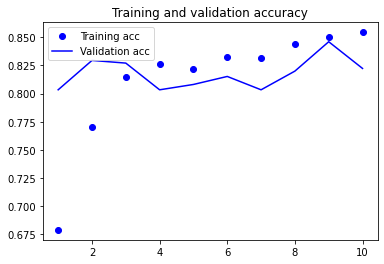

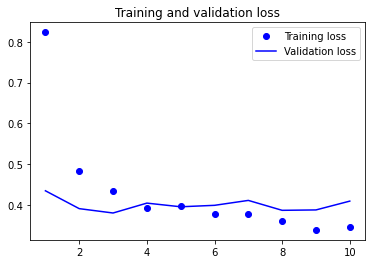

In [145]:
# plotting

# displaying the accuracy and loss over the training epochs
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Dropout & data augmentation 2


In [122]:
# Sequential model | Create linear stack of layers
model = Sequential()

# Convolutional layer | Conv2D
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model.add(Flatten())
model.add(Dropout(0.5))
# Hidden layer
model.add(Dense(32, activation='relu'))
# Output layer
model.add(Dense(1, activation='sigmoid'))

In [123]:
# compiling the model
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [124]:
# visualizing the model structure
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 175232)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                5607456   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 5,608,385
Trainable params: 5,608,385
Non-trainable params: 0
____________________________________________

In [125]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# test set only rescaled
test_datagen = ImageDataGenerator(rescale = 1./255)

In [126]:
# importing the images
# flow when numpy array input, flow_from_directory when the inputs are directly images

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = 23,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = 23,
                                                        color_mode="rgb",
                                                        class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = 23,
                                            class_mode = 'binary',
                                            shuffle = False)


Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [127]:
# fitting the model
Epochs = 10


hist=model.fit_generator(training_set,
                         steps_per_epoch = 86,
                         epochs = 10,
                         validation_data = validation_set,
                         validation_steps = len(validation_set)
                         )

Epoch 1/10
86/86 [==============================] - 139s 2s/step - loss: 1.0373 - accuracy: 0.6657 - val_loss: 0.4342 - val_accuracy: 0.7796
Epoch 2/10
86/86 [==============================] - 138s 2s/step - loss: 0.4721 - accuracy: 0.7658 - val_loss: 0.4267 - val_accuracy: 0.8057
Epoch 3/10
86/86 [==============================] - 134s 2s/step - loss: 0.4140 - accuracy: 0.8145 - val_loss: 0.4138 - val_accuracy: 0.7962
Epoch 4/10
86/86 [==============================] - 143s 2s/step - loss: 0.3714 - accuracy: 0.8274 - val_loss: 0.3925 - val_accuracy: 0.8081
Epoch 5/10
86/86 [==============================] - 143s 2s/step - loss: 0.3291 - accuracy: 0.8632 - val_loss: 0.3771 - val_accuracy: 0.8199
Epoch 6/10
86/86 [==============================] - 142s 2s/step - loss: 0.3306 - accuracy: 0.8485 - val_loss: 0.3551 - val_accuracy: 0.8460
Epoch 7/10
86/86 [==============================] - 139s 2s/step - loss: 0.3038 - accuracy: 0.8747 - val_loss: 0.4315 - val_accuracy: 0.8199
Epoch 8/10
86

In [128]:
# FINALLY OUR MODEL PREDICT

Y_pred = model.predict_generator(test_set, len(validation_set))    # ceil(num_of_test_samples / batch_size)

# changing the result as True and False
Y_pred = (Y_pred>0.5)


In [129]:
Y_pred.shape

(422, 1)

In [130]:
test_set.classes.shape

(422,)

## Prediction assessment

In [131]:
# confusion matrix
print('Confusion matrix')
print(confusion_matrix(test_set.classes, Y_pred))

Confusion matrix
[[183  28]
 [ 31 180]]


In [132]:
# classification report
print('Classification Report')
target_names = ['No Mask', 'Mask']
print(classification_report(test_set.classes, Y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     No Mask       0.86      0.87      0.86       211
        Mask       0.87      0.85      0.86       211

    accuracy                           0.86       422
   macro avg       0.86      0.86      0.86       422
weighted avg       0.86      0.86      0.86       422



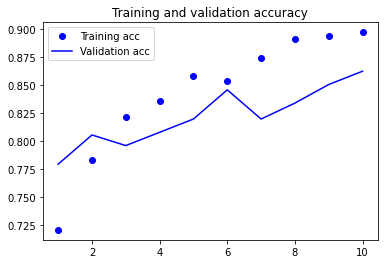

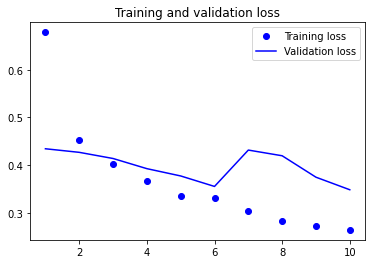

In [133]:
# plotting

# displaying the accuracy and loss over the training epochs
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
Y_pred.target_names

In [ ]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

plt.show()

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(test_datagen.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

AttributeError: 'ImageDataGenerator' object has no attribute 'take'

<Figure size 720x720 with 0 Axes>

In [108]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time

In [109]:
def read_image(file_path):
   print('[INFO] loading and preprocessing image…') 
   image = load_img(file_path, target_size=(224, 224)) 
   image = img_to_array(image) 
   image = np.expand_dims(image, axis=0)
   image /= 255. 
   return image
def test_single_image(path):
  animals = ['no mask', 'mask']
  images = read_image(path)
  time.sleep(.5)
  bt_prediction = model.predict(images) 
  preds = model.predict_proba(bt_prediction)
  for idx, animal, x in zip(range(0,6), animals , preds[0]):
   print('ID: {}, Label: {} {}%'.format(idx, animal, round(x*100,2) ))
  print('Final Decision:')
  time.sleep(.5)
  for x in range(3):
   print('.'*(x+1))
   time.sleep(.2)
  class_predicted = model.predict_classes(bt_prediction)
  class_dictionary = generator_top.class_indices 
  inv_map = {v: k for k, v in class_dictionary.items()} 
  print('ID: {}, Label: {}'.format(class_predicted[0],  inv_map[class_predicted[0]])) 
  return load_img(path)
path = r"C:\Users\marta\Documents\Big data\NOVA IMS\20202021\2nd Semester\Deep learning\Project\test\masks\Image1275.jpg"
test_single_image(path)

[INFO] loading and preprocessing image…


ValueError: in user code:

    C:\Users\marta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\marta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\marta\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\marta\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\marta\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\marta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\marta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\marta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\marta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\marta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:424 call
        return self._run_internal_graph(
    C:\Users\marta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\marta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\marta\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_4 is incompatible with the layer: expected axis -1 of input shape to have value 161312 but received input with shape (None, 394272)


# Next Steps : improving the NN

In [ ]:
### Code for DATA AUGMENTATION

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
# test set only rescaled
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Set callbacks to analyze the best number of epochs | Try 25,50, and 100

  earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                          mode ="min", patience = 5,  
                                          restore_best_weights = True) 
  
  history = model.fit(partial_images, partial_labels, batch_size = 128,  
                      epochs = 25, validation_data =(X_val, y_val),  
                      callbacks =[earlystopping]) 

In [ ]:
# Train the model for XXXXXX epochs
#model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=XXXXXXX)

In [ ]:
# Evaluate the model
_, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))

### 4. Model assessment

### 5. Deployment

Example
https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

Problems websites

https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part1.ipynb

https://github.com/python-pillow/Pillow/issues/1006